# Projeto de Machine Learning

Marcelo Cesário Miguel

William Augusto Reis da Silva

In [148]:
import numpy as np
import pandas as pd
import random
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score,f1_score
import os
from tensorflow.keras import layers

## Organização das imagens

#### Organização de imagens por lista de categoria

In [84]:
np.random.seed(20)
ROWS = 150
COLS = 150
CHANNELS = 3

BATCH_SIZE=128


In [85]:
TRAIN_SCISSOR = []
TRAIN_ROCK = []
TRAIN_PAPER = []
TEST_IMAGES = []
Dir = './rock_paper_scissors/'
for i in os.listdir(Dir):
    for j in os.listdir(Dir+i):
        dir_image = f"{Dir}{i}/{j}"
        if i == 'scissors':
            TRAIN_SCISSOR.append(dir_image)
        elif i == 'rock':
            TRAIN_ROCK.append(dir_image)
        else:
            TRAIN_PAPER.append(dir_image)
print(len(TRAIN_PAPER) + len(TRAIN_ROCK)+len(TRAIN_SCISSOR))

2188


#### Divisão em Treinamento (0.8) e Teste (0.2)

In [86]:
TEST_IMAGES = TRAIN_SCISSOR[int(len(TRAIN_SCISSOR)*0.8):] + TRAIN_ROCK[int(len(TRAIN_ROCK)*0.8):] + TRAIN_PAPER[int(len(TRAIN_PAPER)*0.8):]

In [87]:
len(TEST_IMAGES)

439

In [88]:
TRAIN_SCISSOR = TRAIN_SCISSOR[:int(len(TRAIN_SCISSOR)*0.8)]
TRAIN_ROCK = TRAIN_ROCK[:int(len(TRAIN_ROCK)*0.8)]
TRAIN_PAPER = TRAIN_PAPER[:int(len(TRAIN_PAPER)*0.8)]

In [89]:
print(len(TRAIN_PAPER) + len(TRAIN_ROCK)+len(TRAIN_SCISSOR) + len(TEST_IMAGES))

2188


In [90]:
TRAIN_IMAGES = TRAIN_PAPER+ TRAIN_ROCK + TRAIN_SCISSOR
random.shuffle(TRAIN_IMAGES)
random.shuffle(TEST_IMAGES)

In [91]:
len(TRAIN_IMAGES)
TRAIN_IMAGES[0]

'./rock_paper_scissors/rock/8vkvSVmLwxY1SH3p.png'

#### Funções de plotar imagem

In [149]:
def plot_arr(arr):
    plt.figure()
    plt.imshow(image.array_to_img(arr))
    plt.show()

def plot(img):
    plt.figure()
    plt.imshow(img)
    plt.show()

#### Função de preparação dos inputs do modelo (criação de tensor)

In [93]:
def prep_data(images):
    count = len(images)
    X = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.float32)
    y = np.zeros((count,), dtype=np.float32)
    print("Starting")
    for i, image_file in enumerate(images):
        img = image.load_img(image_file, target_size=(ROWS, COLS))
        X[i] = image.img_to_array(img)
        if '/scissors/' in image_file:
            y[i] = 1.
        elif '/paper/' in image_file:
            y[i] = 2.
    
        i+=1
        if i == count:
            print('Processed {} of {}'.format(i, count))
        else:
            if i%1000 == 0: print('Processed {} of {}'.format(i, count))
        
    return X, y


In [94]:
X_train, y_train = prep_data(TRAIN_IMAGES)

Starting
Processed 1000 of 1749
Processed 1749 of 1749


In [95]:
X_test, y_test = prep_data(TEST_IMAGES)

Starting
Processed 439 of 439


In [96]:
X_train.shape

(1749, 150, 150, 3)

In [97]:
print(y_train)

[0. 1. 2. ... 2. 2. 0.]


#### Padronização do tamanho das imagens

In [98]:
image_datagen = image.ImageDataGenerator(rescale=1./255)

In [99]:
train_generator = image_datagen.flow(
    X_train,
    y_train,
    batch_size=BATCH_SIZE)


In [100]:
test_generator = image_datagen.flow(
    X_test,
    y_test,
    batch_size=BATCH_SIZE)

#### Plotagem das imagens em formato padronizado

In [101]:
def plot_images(datagen):
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = datagen.next()
        # convert to unsigned integers for viewing
        image_ = batch[0]
        # plot raw pixel data
        plt.imshow(image_[0])
    plt.show()

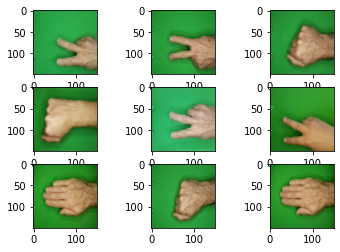

In [102]:
plot_images(train_generator)

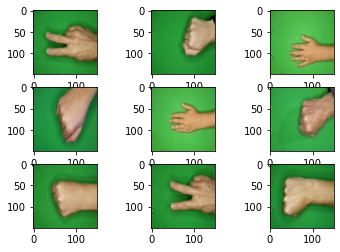

In [103]:
plot_images(test_generator)

In [104]:
X_train.shape

(1749, 150, 150, 3)

## Criação do modelo e execução

#### Criação da rede neural

In [105]:
num_classes = 3

model = Sequential([
  layers.Conv2D(16, (3, 3), padding='valid', input_shape=(ROWS, COLS, CHANNELS)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])



In [106]:
# model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

#### Aprendizagem da rede

In [108]:
epochs=10
history = model.fit(
  train_generator,
  validation_data=test_generator,
  epochs=epochs
)


Epoch 1/10
14/14 [==============================] - 16s 1s/step - loss: 1.1349 - accuracy: 0.5306 - val_loss: 0.7582 - val_accuracy: 0.7768
Epoch 2/10
14/14 [==============================] - 15s 1s/step - loss: 0.5867 - accuracy: 0.8039 - val_loss: 0.4627 - val_accuracy: 0.8314
Epoch 3/10
14/14 [==============================] - 15s 1s/step - loss: 0.3982 - accuracy: 0.8776 - val_loss: 0.3540 - val_accuracy: 0.8884
Epoch 4/10
14/14 [==============================] - 15s 1s/step - loss: 0.2465 - accuracy: 0.9245 - val_loss: 0.2400 - val_accuracy: 0.9226
Epoch 5/10
14/14 [==============================] - 15s 1s/step - loss: 0.1537 - accuracy: 0.9543 - val_loss: 0.1945 - val_accuracy: 0.9271
Epoch 6/10
14/14 [==============================] - 15s 1s/step - loss: 0.1035 - accuracy: 0.9714 - val_loss: 0.1191 - val_accuracy: 0.9476
Epoch 7/10
14/14 [==============================] - 15s 1s/step - loss: 0.0861 - accuracy: 0.9726 - val_loss: 0.1161 - val_accuracy: 0.9476
Epoch 8/10
14/14 [==

In [109]:
model.save('rock_paper_scissor.h5')

#### Desempenho da rede

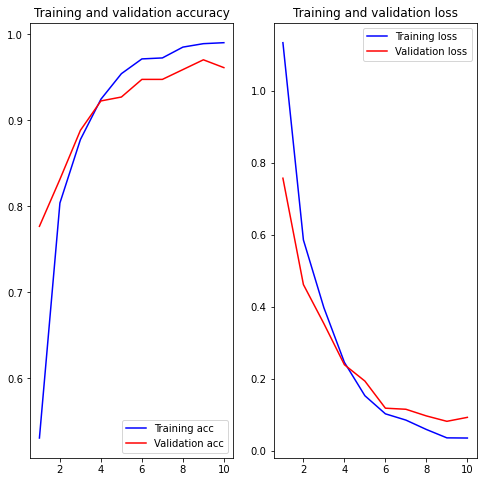

In [110]:
plt.figure(figsize=(8, 8))



loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Predição do modelo

In [111]:
predictions = model.predict(X_test)
predictions[0]

array([0., 1., 0.], dtype=float32)

In [112]:
y_pred = np.argmax(predictions, axis=1)

In [113]:
matrix = confusion_matrix(y_test, y_pred)
target_names = ['Rock', 'Scissor', 'Paper']

In [114]:
matrix

array([[142,   2,   2],
       [  0, 148,   2],
       [  3,  10, 130]], dtype=int64)

In [115]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
rps_df = pd.DataFrame(matrix,
                     index = target_names, 
                     columns = target_names)


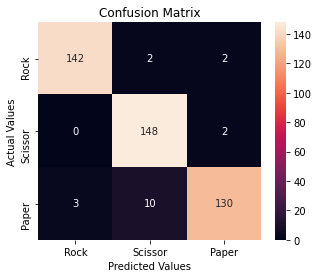

In [116]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(rps_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### Perguntas a serem respondidas:

Qual a proporção de acerto em cada formato? (Precision)

Quantos % da predição do modelo realmente estão certas? (Recall)

In [117]:
print("DESEMPENHO")
print(classification_report(y_test, y_pred, target_names=target_names))

DESEMPENHO
              precision    recall  f1-score   support

        Rock       0.98      0.97      0.98       146
     Scissor       0.93      0.99      0.95       150
       Paper       0.97      0.91      0.94       143

    accuracy                           0.96       439
   macro avg       0.96      0.96      0.96       439
weighted avg       0.96      0.96      0.96       439



I am 100.00% sure this is a scissor


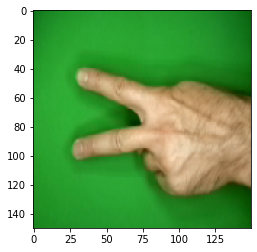

I am 100.00% sure this is a rock


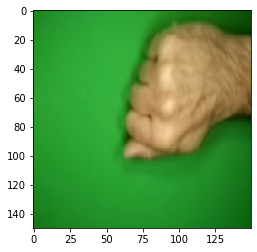

I am 100.00% sure this is a paper


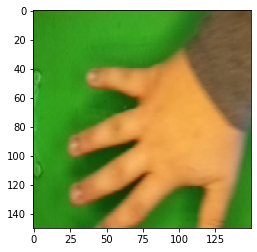

I am 100.00% sure this is a rock


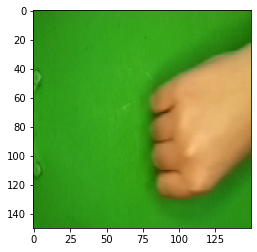

I am 100.00% sure this is a rock


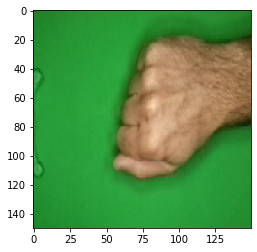

I am 100.00% sure this is a scissor


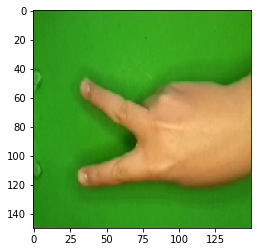

I am 100.00% sure this is a scissor


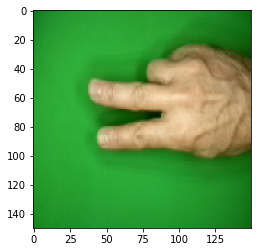

I am 100.00% sure this is a paper


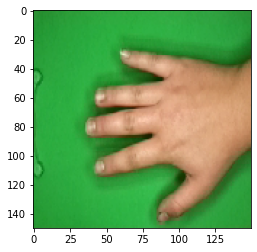

I am 100.00% sure this is a scissor


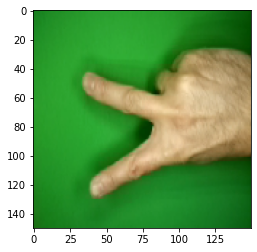

I am 100.00% sure this is a scissor


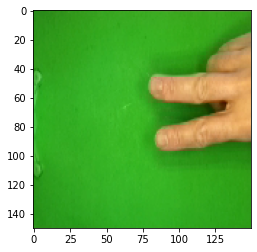

In [118]:
def print_predictions(predictions):    
    for i in range(0,10):
        score = predictions[i]
        if np.argmax(score) == 0:
            formato = "rock"
        elif np.argmax(score) == 1:
            formato = "scissor"
        else:
            formato = "paper"
        print('I am {:.2%} sure this is a {}'.format(np.max(score),formato))
        plt.imshow(image.array_to_img(X_test[i]))
        plt.show()
print_predictions(predictions)

In [119]:
def find_format(score):
    if np.argmax(score) == 0:
        formato = "rock"
    elif np.argmax(score) == 1:
        formato = "scissor"
    else:
        formato = "paper"
    return formato
def check_winner(format1,format2):
    vencedor = 0
    if format1 == format2:
        return 0
    if (format1 == "rock" and format2 == "scissor") or (format1 =="scissor" and format2 == "paper") or (format1 == "paper" and format2 =="rock"):
        return 1
    return 2

                  Partida 1


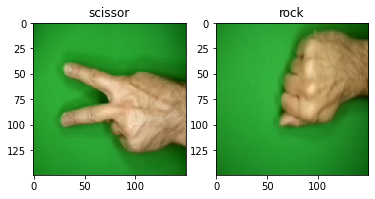

Winner: Player 2

----------------------------------------

                  Partida 2


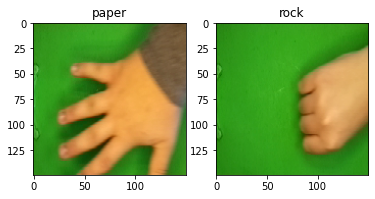

Winner: Player 1

----------------------------------------

                  Partida 3


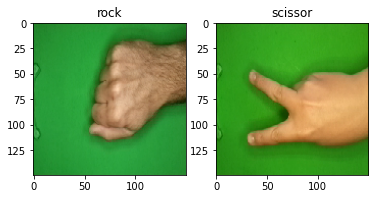

Winner: Player 1

----------------------------------------

                  Partida 4


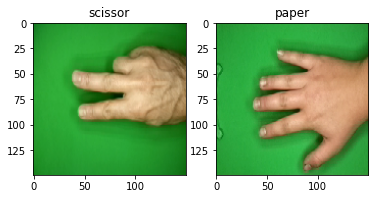

Winner: Player 1

----------------------------------------

                  Partida 5


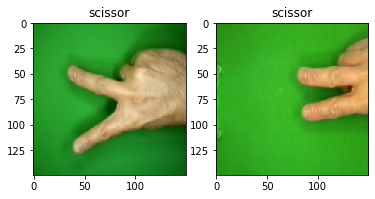

Draw

----------------------------------------

                  Partida 6


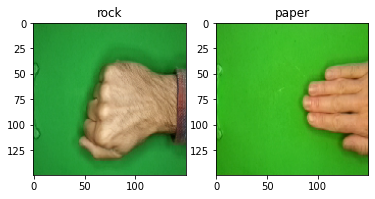

Winner: Player 2

----------------------------------------

                  Partida 7


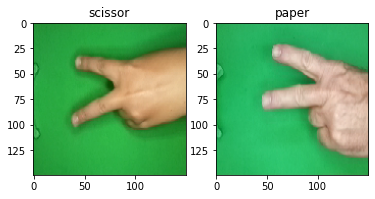

Winner: Player 1

----------------------------------------

                  Partida 8


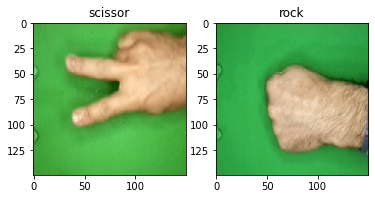

Winner: Player 2

----------------------------------------

                  Partida 9


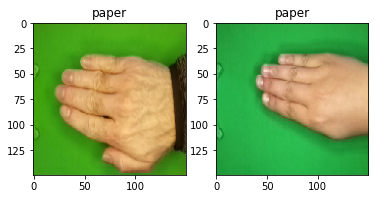

Draw

----------------------------------------

                  Partida 10


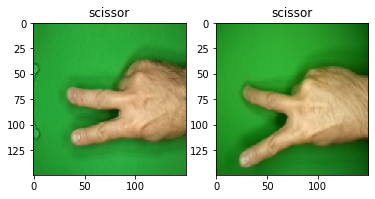

Draw

----------------------------------------

                  Partida 11


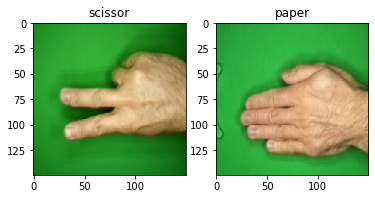

Winner: Player 1

----------------------------------------

                  Partida 12


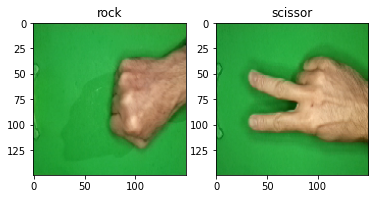

Winner: Player 1

----------------------------------------

                  Partida 13


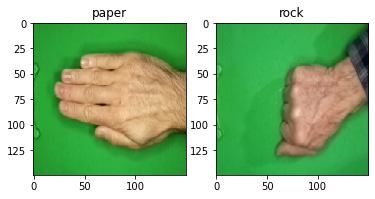

Winner: Player 1

----------------------------------------

                  Partida 14


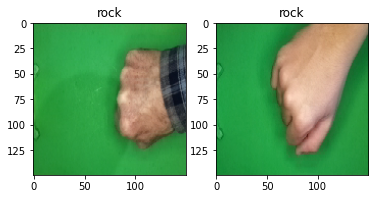

Draw

----------------------------------------

                  Partida 15


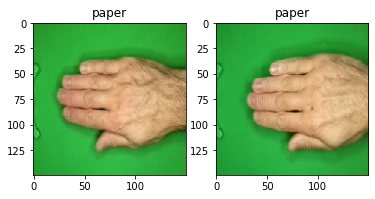

Draw

----------------------------------------



In [120]:
for i in range(0,30,2):
    print(f"                  Partida {int(i/2)+1}")
    score1 = predictions[i]
    score2 = predictions[i+1]
    format1 = find_format(score1)
    format2 = find_format(score2)
    winner = check_winner(format1,format2)
    plt.subplot(1, 2, 1)
    plt.title(format1)
    plt.imshow(image.array_to_img(X_test[i]))
    plt.subplot(1, 2, 2)
    plt.title(format2)
    plt.imshow(image.array_to_img(X_test[i+1]))
    plt.show()
    if winner ==0:
        print(f"Draw")
    else:
        print(f"Winner: Player {winner}")
    print('')
    print('--'*20)
    print('')


In [121]:
list_image_test = []
for i in os.listdir('./image_test'):
    list_image_test.append(f'image_test/{i}')
random.shuffle(list_image_test)

In [122]:
def prep_test_image(images):
    count = len(images)
    X = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.float32)

    print("Starting")
    for i, image_file in enumerate(images):
        img = image.load_img(image_file, target_size=(ROWS, COLS))
        X[i] = image.img_to_array(img)
        
        if i+1 == (count):
            print('Processed {} of {}'.format(i+1, count))
        if (i+1)%2 == 0: print('Processed {} of {}'.format(i+1, count))
    
    return X


In [123]:
X_test = prep_test_image(list_image_test)

Starting
Processed 2 of 11
Processed 4 of 11
Processed 6 of 11
Processed 8 of 11
Processed 10 of 11
Processed 11 of 11


In [131]:
X_test.shape

(11, 150, 150, 3)

In [124]:
predictions = model.predict(X_test)

I am 100.00% sure this is a paper


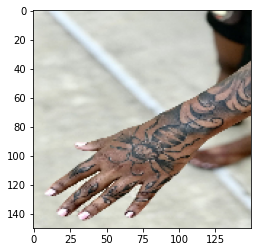

I am 100.00% sure this is a scissor


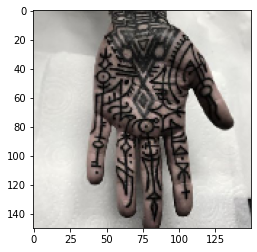

I am 100.00% sure this is a paper


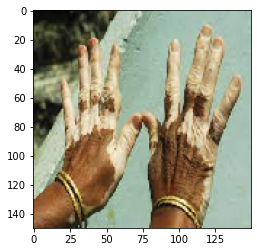

I am 100.00% sure this is a rock


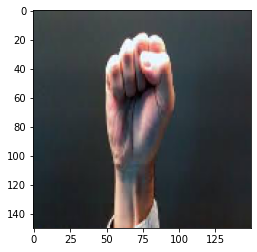

I am 100.00% sure this is a paper


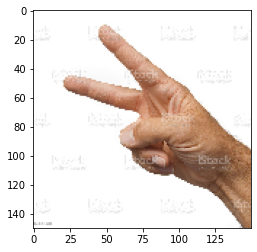

I am 100.00% sure this is a paper


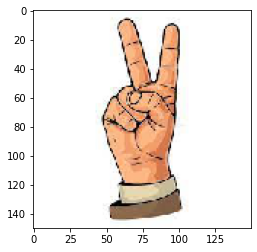

I am 100.00% sure this is a scissor


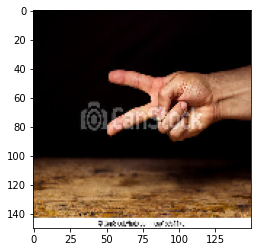

I am 100.00% sure this is a paper


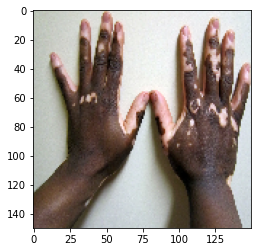

I am 100.00% sure this is a paper


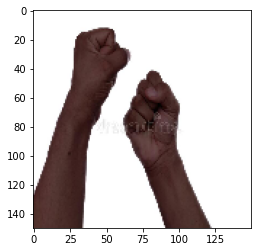

I am 100.00% sure this is a paper


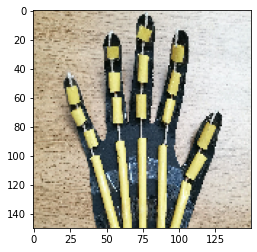

In [125]:
print_predictions(predictions)

I am 39.29% sure this is a paper


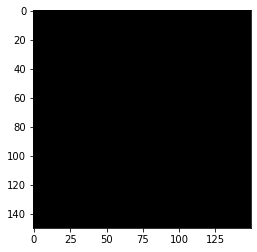

In [152]:
def print_predictions_a(predictions, img):
    score = predictions[0]
    if np.argmax(score) == 0:
        formato = "rock"
    elif np.argmax(score) == 1:
        formato = "scissor"
    else:
        formato = "paper"
    print('I am {:.2%} sure this is a {}'.format(np.max(score),formato))
    plot_arr(img)
        
img = np.zeros((150, 150, 3))
X = img[np.newaxis, :,:,:]
a = model.predict(X)
print_predictions_a(a, img)